# <center>Ridge Regression</center>

Pre-Requisites: [Bias-Variance Tradeoff](./Bias_Variance.ipynb)

Regularization is a popular technique in machine learning to avoid overfitting. It prevents overfitting by increasing bias and decreasing variance therby inducing a smoother model. It achieves this by adding a penatly term to the objective function. 

The type of penalty term used is what differentiates different types of regularization. Ridge regression is a popular type of regularization that refers to the following Penalty term (Also known as the L2 Penalty Term): 

$$\lambda \sum_{i = 1}^{m} w_i^2$$

$\lambda$ controls the strength of the regularization often called the regularization parameter.

In the context of Polynomial Ridge Regression our new objective function would like 

$$\underset{w}{min} ||y - Xw||_2^2 + \lambda||w||^2_2$$

In matrix form

$$\underset{w}{min} ||\begin{bmatrix} y \\ 0 \end{bmatrix} - \begin{bmatrix} X \\ -\sqrt{\lambda}I \end{bmatrix}w||_2^2$$

(Note: Because $||a||^2_2 + ||b||^2_2 = ||\begin{bmatrix} a \\ b \end{bmatrix}||^2_2$)


Recall from [Linear Regression](./Linear_Regression.ipynb) that the formal solution to least squares is $w = (X^TX)^{-1}X^Ty$  

We can derive the formal Solution to regularized least squares by substituting X and y with the above matrices

$$w = (\begin{bmatrix}X^T & -\sqrt{\lambda}I\end{bmatrix}\begin{bmatrix} X \\ - \sqrt{\lambda}I \end{bmatrix})^{-1}\begin{bmatrix}X^T & -\sqrt{\lambda}I \end{bmatrix}\begin{bmatrix}y \\ 0 \end{bmatrix}$$
$$= (X^TX + \lambda I)^{-1}X^Ty$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

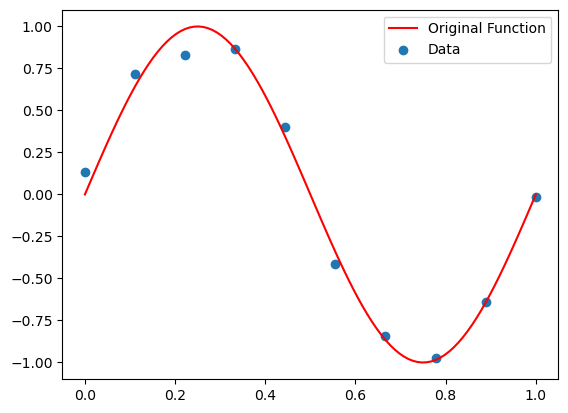

In [4]:
np.random.seed(10)
n = 10
x = np.linspace(0, 1, n)
# y = np.polyval(np.array([1, -4, 3, 4]), x) + np.random.normal(0, 10, n)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, n)

# Code to Plot the original function
xx = np.linspace(0, 1, 100)
# yy = np.polyval(np.array([1, -4, 3, 4]), xx)
yy = np.sin(2 * np.pi * xx)
plt.plot(xx, yy, color='red')
plt.scatter(x, y)
plt.legend(['Original Function', 'Data'])
plt.show()

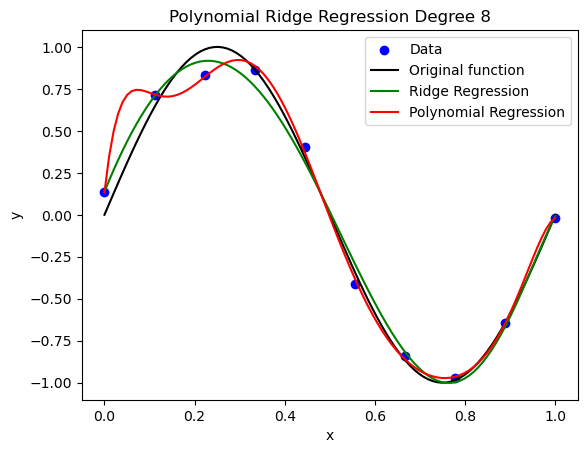

In [22]:
# Polynomial Ridge Regression
def polynomial_features(x, m):
    matrix = np.column_stack([x**i for i in range(1, m + 1)])
    return np.hstack((np.ones((matrix.shape[0],1)), matrix))

def ridge_polynomial(x, y, m, lambd):
    ridge_append = np.sqrt(lambd) * np.identity(m + 1)
    x_train = np.vstack((x, ridge_append))
    zerofill = np.zeros((x_train.shape[0] - y.shape[0], 1))
    y_train = np.vstack((y, zerofill))
    return x_train, y_train

deg = 8

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
lambd = 0.0001

x_train = polynomial_features(x, deg)
res2 = np.linalg.lstsq(x_train, y, rcond=None)
w2 = res2[0]

x_train, y_train = ridge_polynomial(x_train, y, deg, lambd)
res = np.linalg.lstsq(x_train, y_train, rcond=None)
w = res[0]

x_fit = np.linspace(0, 1, 100).reshape(-1, 1)
x_fit_poly = polynomial_features(x_fit, deg)
y_fit = x_fit_poly.dot(w)
y_fit2 = x_fit_poly.dot(w2)

plt.scatter(x, y, color='blue', label='Data')
plt.plot(xx, yy, color='black', label=f'Original function')
plt.plot(x_fit, y_fit, color='green', label=f'Ridge Regression')
plt.plot(x_fit, y_fit2, color='red', label=f'Polynomial Regression')
plt.title(f'Polynomial Ridge Regression Degree {deg}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



A close look at the graph shows how polynomial ridge regression results in a smoother graph compared to the original polynomial regression even with higher degree polynomials. Ridge Regression does a good job "smoothing" out the curve with the help of the L2 penalty term by penalizing weights that are too large and thereby decreasing the models problem of overfitting

# References

https://www.ibm.com/topics/regularization  
https://htmlpreview.github.io/?https://github.com/echow/ml-matlab/blob/main/live/polyregr_ridge.html